Description of physical setup:		
The data comes from a continuous flow process.		
Sample rate is 1 Hz.		
In the first stage, Machines 1, 2,  and 3 operate in parallel, and feed their outputs into a step that combines the flows.		
Output from the combiner is measured in 15 locations. These measurements are the primary measurements to predict.		
Next, the output flows into a second stage, where Machines 4 and 5 process in series.		
Measurements are made again in the same 15 locations. These are the secondary measurements to predict.		
		
Measurements are noisy.		
Each measurement also has a target or Setpoint (setpoints are included in the first row of data).		
The goal is to predict the measurements (or the error versus setpoints) for as many of the 15 measurements as possible.		
Some measurements will be more predictable than others!		
Prediction of measurements after the first stage are the primary interest.		
Prediction of measurements after the second stage are nice-to-have but the data is much more noisy.		
		
Note on variable naming conventions:
- ~.C.Setpoint		Setpoint for Controlled variable
- ~.C.Actual		Actual value of Controlled variable
- ~.U.Actual		Actual value of Uncontrolled variable
- Others		Environmental or raw material variables, States / events, etc.
		
Start col | End col	| Description
--|--|--
0	|0 	| Time stamp
1	|2 	| Factory ambient conditions
3	|6 	| First stage, Machine 1, raw material properties (material going in to Machine 1)
7	|14 |  First stage, Machine 1 process variables
15	|18 |  First stage, Machine 2, raw material properties (material going in to Machine 2)
19	|26 |  First stage, Machine 2 process variables
27	|30 |  First stage, Machine 3, raw material properties (material going in to Machine 3)
31	|38 |  First stage, Machine 3 process variables
39	|41 |  Combiner stage process parameters. Here we combines the outputs from Machines 1, 2, and 3.
42	|71 |  PRIMARY OUTPUT TO CONTROL: Measurements of 15 features (in mm), along with setpoint or target for each
72	|78 |  Second stage, Machine 4 process variables
79	|85 |  Second stage, Machine 5 process variables
86	|115|   SECONDARY OUTPUT TO CONTROL: Measurements of 15 features (in mm), along with setpoint or target for each

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/continuous_factory_process.csv")

df.head(10)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
5,2019-03-06 10:52:38,17.24,23.53,11.54,200,963.0,247,1262.73,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.0,247,1306.38,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.0,247,1296.13,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
8,2019-03-06 10:52:41,17.24,23.53,11.54,200,963.0,247,1251.11,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
9,2019-03-06 10:52:42,17.24,23.53,11.54,200,963.0,247,1202.16,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [3]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.890000e+00,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,2.730357e-12,1.182333e+00,1.820830e-13,4.145398e-01,3.790436e-13,4.768244e-01,4.361111e-13,2.082948,5.666779e-13
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.890000e+00,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.890000e+00,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.890000e+00,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.890000e+00,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.890000e+00,14.260000,1.171000e+01


In [8]:
df.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Columns: 116 entries, time_stamp to Stage2.Output.Measurement14.U.Setpoint
dtypes: float64(108), int64(7), object(1)
memory usage: 12.5+ MB


In [10]:
df.select_dtypes("object")

,time_stamp
0,2019-03-06 10:52:33
1,2019-03-06 10:52:34
2,2019-03-06 10:52:35
3,2019-03-06 10:52:36
4,2019-03-06 10:52:37
...,...
14083,2019-03-06 14:47:16
14084,2019-03-06 14:47:17
14085,2019-03-06 14:47:18
14086,2019-03-06 14:47:19


In [12]:
df.duplicated().any()

False

In [28]:
[col for col in df.columns if "Machine1" in col]

['Machine1.RawMaterial.Property1',
 'Machine1.RawMaterial.Property2',
 'Machine1.RawMaterial.Property3',
 'Machine1.RawMaterial.Property4',
 'Machine1.RawMaterialFeederParameter.U.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine1.MotorAmperage.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine1.ExitZoneTemperature.C.Actual']

In [38]:
# Stage one output (setpoint) and target values (actual)
df.iloc[:10, 42:72]

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,...,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51,17.72
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
5,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
6,12.54,13.75,0.0,22.74,11.89,13.02,21.96,21.88,0.00,32.55,...,7.97,8.65,5.34,6.16,1.62,2.02,2.65,3.16,14.60,17.72
7,12.54,13.75,0.0,22.74,11.89,13.02,21.96,21.88,0.00,32.55,...,7.97,8.65,5.34,6.16,1.62,2.02,2.65,3.16,14.60,17.72
8,12.35,13.75,0.0,22.74,0.00,13.02,18.10,21.88,31.83,32.55,...,0.00,8.65,0.00,6.16,0.00,2.02,1.77,3.16,0.00,17.72
9,12.35,13.75,0.0,22.74,0.00,13.02,18.10,21.88,31.83,32.55,...,0.00,8.65,0.00,6.16,0.00,2.02,1.77,3.16,0.00,17.72


In [39]:
df_err = df.copy(deep=True)
for i in range(15):
    df_err[f"stage1_measure{i}_err"] = df[f"Stage1.Output.Measurement{i}.U.Setpoint"] - df[f"Stage1.Output.Measurement{i}.U.Actual"]

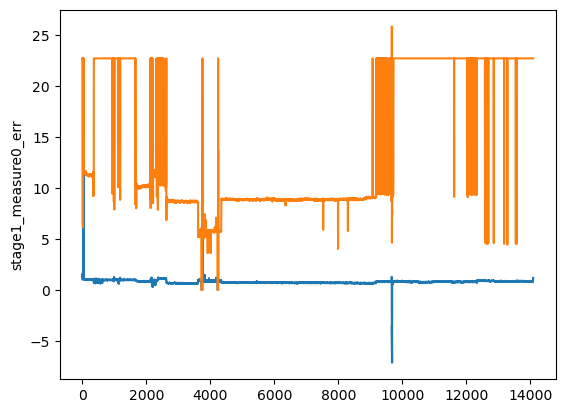

In [41]:
for i in range(2):
    sns.lineplot(x=df_err.index, y=df_err[f"stage1_measure{i}_err"])
# sns.lineplot(x=df.iloc[:, 43].index, y=df.iloc[:, 43])